<h1>Chapter 3 | Data Exercise #5 | Population of Brazil's largest cities | Measuring the distribution</h1>
<h2>Introduction:</h2>
<p>In this notebook, you will find my notes and code for Chapter 3's <b>exercise 5</b> of the book <a href="https://gabors-data-analysis.com/">Data Analysis for Business, Economics, and Policy</a>, by Gábor Békés and Gábor Kézdi. The question was: 
<p>5. Choose a large country (e.g., China, Japan, the United Kingdom) and find data on the population of its largest cities.</p>
<p>Assignments:</p>
<ul>
    <li>Plot the histogram of the distribution and create a table with the most important summary statistics.</li>
    <li>Plot the histogram of log population as well.</li>
    <li>Finally, create a log rank-log population plot.</li>
    <li>Is the normal, lognormal, or the power-law distribution a good approximation of the distribution? Why?</li>
</ul>
<p>For this exercise, we will use the latest data from 2022 Brazil's census, which has just been released. The data has been cleaned, prepared and properly stored by <a href="https://www.basedosdados.org.br">Base dos Dados</a>, an excellent database for Brazilian public data, just ready to be consummed and analyzed! Thank you Base dos Dados!</p> 
<h2><b>1.</b> Load the data</h2>

In [23]:
import os
import sys
import warnings
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [14]:
# Current script folder
dirname = os.getcwd()
func_path = dirname.split("da_data_exercises")[0]
# Get location folders
data_in = f"{dirname}/data/raw/"
data_out = f"{dirname}/data/clean/"

func = f"{func_path}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [15]:
from py_helper_functions import *

In [16]:
df = pd.read_csv(f"{data_in}pop_municipios_clean.csv")

In [17]:
df.head()

,ano,sigla_uf,id_municipio,populacao,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,1991,RO,1100015,31981,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
1,1992,RO,1100015,34768,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
2,1993,RO,1100015,37036,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
3,1994,RO,1100015,39325,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
4,1995,RO,1100015,41574,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11


<h2>1.1 Rename columns</h2>
<p>Because we are writing in English, it makes sense to translate the column names so that they are easily understandable.</p>

In [18]:
df.rename(columns={
    "ano": "year",
    "sigla_uf": "state_abbr",
    "id_municipio": "city_id",
    "populacao": "population",
    "codigo_ibge": "ibge_id",
    "nome": "city_name",
    "capital": "is_capital",
    "codigo_uf": "state_id",
}, inplace=True)

<h2>1.2 Filter the data</h2>
<p>Let's filter the year and return only observations for 2022. In addition, we are looking for the largest cities in Brazil. We can first order the DataFrame by city size and get hold of the largest cities.</p> 

In [26]:
cities_2022 = df.loc[df["year"] == 2022].sort_values(by="population", ascending=False)

In [28]:
cities_2022.head(20)

,year,state_abbr,city_id,population,ibge_id,city_name,latitude,longitude,is_capital,state_id
119735,2022,SP,3550308,12200180,3550308,São Paulo,-23.53290,-46.6395,1,35
101122,2022,RJ,3304557,6625849,3304557,Rio de Janeiro,-22.91290,-43.2003,1,33
173852,2022,DF,5300108,2923369,5300108,Brasília,-15.77950,-47.9297,1,53
67283,2022,BA,2927408,2610987,2927408,Salvador,-12.97180,-38.5011,1,29
28973,2022,CE,2304400,2596157,2304400,Fortaleza,-3.71664,-38.5423,1,23
71967,2022,MG,3106200,2392678,3106200,Belo Horizonte,-19.91020,-43.9266,1,31
3484,2022,AM,1302603,2054731,1302603,Manaus,-3.11866,-60.0212,1,13
125272,2022,PR,4106902,1871789,4106902,Curitiba,-25.41950,-49.2646,1,41
49227,2022,PE,2611606,1494586,2611606,Recife,-8.04666,-34.8771,1,26
169056,2022,GO,5208707,1414483,5208707,Goiânia,-16.68640,-49.2643,1,52


<p>We can use the value of <code>500,000</code> as a benchmark to filter our dataset, as it is a reference for large cities and widely used.</p>

In [29]:
cities_2022 = cities_2022.loc[cities_2022["population"] > 500_000]

In [33]:
cities_2022.count()

year          44
state_abbr    44
city_id       44
population    44
ibge_id       44
city_name     44
latitude      44
longitude     44
is_capital    44
state_id      44
dtype: int64

<p>As we can see, there are 44 cities with more than 500,00 inhabitants in Brazil.</p>

In [34]:
cities_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 119735 to 166658
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        44 non-null     int64  
 1   state_abbr  44 non-null     object 
 2   city_id     44 non-null     int64  
 3   population  44 non-null     int64  
 4   ibge_id     44 non-null     int64  
 5   city_name   44 non-null     object 
 6   latitude    44 non-null     float64
 7   longitude   44 non-null     float64
 8   is_capital  44 non-null     int64  
 9   state_id    44 non-null     int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 3.8+ KB


<h2>2. EDA</h2>
<h3>2.1 Plot the histogram of the distribution and create a table with the most important summary statistics</h3>
<h4>2.1.1 Plotting the histogram</h4>

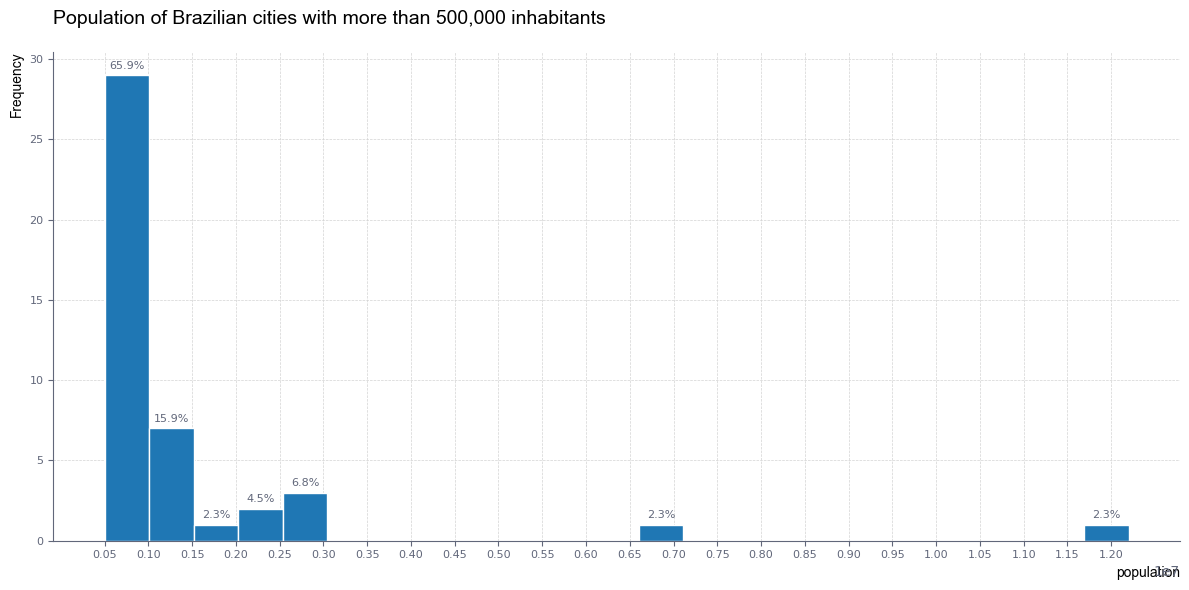

In [45]:
# Visualize the distribution of population, no filters
# Set the bin width
bin_width = 500_000

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(cities_2022["population"], bins=int((cities_2022["population"].max() - cities_2022["population"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("population",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(cities_2022["population"].min() - 1000, cities_2022["population"].max() + 1000, 500_000), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = cities_2022["population"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Population of Brazilian cities with more than 500,000 inhabitants",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()

<p>We can already tell that we are dealing with a <b>extremely</b> skewed distribution. 65% of the largest Brazilian cities have between 500,000 and 1 million inhabitants, while only almost 16% of them have between 1 and 1.5mi. Interestingly, between 1.5mi and 3.0mi, the proportion of cities increases a bit, only to go to zero until we find two large cities. We can tell by now that they are Rio de Janeiro and, following, São Paulo.